In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.grid'] = True

import sys
src_root = os.path.abspath(os.path.join(os.getcwd(), '../src'))
if src_root not in sys.path:
    sys.path.append(src_root)

In [2]:
# Load the external dataset
def load_data(filepath, name):
    df = pd.read_csv(filepath)
    print(f"{name} data loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
    return df

# Model Data Analysis

## Filter Best Models

In [3]:
from itertools import product

data = {}
for (scale, preprocessing, data_type) in product(['standardized', 'normalized'], ['preprocessed', 'non_processed'], ['external', 'augmented']):
    df = load_data(f"../reports/results/training/{scale}/non_engineered/{preprocessing}/{data_type}/cv_history.csv", scale+' '+preprocessing+' '+data_type)

    data[(scale, preprocessing, data_type)] = df

standardized preprocessed external data loaded successfully with 6000 rows and 13 columns.
standardized preprocessed augmented data loaded successfully with 6000 rows and 13 columns.
standardized non_processed external data loaded successfully with 6000 rows and 13 columns.
standardized non_processed augmented data loaded successfully with 6000 rows and 13 columns.
normalized preprocessed external data loaded successfully with 6000 rows and 13 columns.
normalized preprocessed augmented data loaded successfully with 6000 rows and 13 columns.
normalized non_processed external data loaded successfully with 6000 rows and 13 columns.
normalized non_processed augmented data loaded successfully with 6000 rows and 13 columns.


In [64]:
from mda import filter_models

### External Data

In [ ]:
for (scale, preprocessing, data_type) in product(['standardized', 'normalized'], ['preprocessed', 'non_processed'], ['external']):
    optimal_models = filter_models(data[(scale, preprocessing, data_type)])

    print("Best epochs per model:")
    print(optimal_models)

    # optimal_models.to_csv(f"../reports/results/training/{scale}/non_engineered/{preprocessing}/{data_type}/optimal_models.csv", index=False)

Best epochs per model:
            layers activation  batch_size  epoch      loss       mae  \
223           [16]       relu          32    224  0.243459  0.255285   
501           [16]       relu          64    202  0.245398  0.256097   
814           [16]      prelu          32    215  0.242237  0.255664   
1147          [16]      prelu          64    248  0.241833  0.255468   
1497          [32]       relu          32    298  0.237544  0.253197   
1792          [32]       relu          64    293  0.236376  0.252511   
2070          [32]      prelu          32    271  0.237165  0.253005   
2390          [32]      prelu          64    291  0.235855  0.253284   
2672          [64]       relu          32    273  0.230161  0.249906   
2982          [64]       relu          64    283  0.231417  0.250355   
3297          [64]      prelu          32    298  0.230252  0.250754   
3585          [64]      prelu          64    286  0.231097  0.250290   
3876      [32, 16]       relu          32

### Augmented Data

In [ ]:
for (scale, preprocessing, data_type) in product(['standardized', 'normalized'], ['preprocessed', 'non_processed'], ['augmented']):
    optimal_models = filter_models(data[(scale, preprocessing, data_type)])

    print("Best epochs per model:")
    print(optimal_models)

    # optimal_models.to_csv(f"../reports/results/training/{scale}/non_engineered/{preprocessing}/{data_type}/optimal_models.csv", index=False)

Best epochs per model:
            layers activation  batch_size  epoch      loss       mae  \
242           [16]       relu          32    243  0.249227  0.258006   
583           [16]       relu          64    284  0.250013  0.258622   
822           [16]      prelu          32    223  0.250192  0.258921   
1192          [16]      prelu          64    293  0.248061  0.257720   
1412          [32]       relu          32    213  0.246026  0.256713   
1758          [32]       relu          64    259  0.246255  0.256716   
2085          [32]      prelu          32    286  0.245298  0.256868   
2360          [32]      prelu          64    261  0.244786  0.256448   
2645          [64]       relu          32    246  0.242958  0.255763   
2946          [64]       relu          64    247  0.243095  0.255664   
3248          [64]      prelu          32    249  0.242028  0.255278   
3585          [64]      prelu          64    286  0.241518  0.254942   
3884      [32, 16]       relu          32

## Model Selection

In [6]:
from itertools import product

best_models = []

for (scale, preprocessing, data_type) in product(['standardized', 'normalized'],
                                                  ['preprocessed', 'non_processed'],
                                                  ['external', 'augmented']):
    df = load_data(
        f"../reports/results/training/{scale}/non_engineered/{preprocessing}/{data_type}/optimal_models.csv",
        scale + ' ' + preprocessing + ' ' + data_type
    )

    best_row = df.iloc[df['val_loss'].idxmin()].to_dict()
    best_row = {'scale': scale, 'preprocessing': preprocessing, 'data_type': data_type, **best_row}

    best_models.append(best_row)

# Create final DataFrame
best_models = pd.DataFrame(best_models)

standardized preprocessed external data loaded successfully with 20 rows and 13 columns.
standardized preprocessed augmented data loaded successfully with 20 rows and 13 columns.
standardized non_processed external data loaded successfully with 20 rows and 13 columns.
standardized non_processed augmented data loaded successfully with 20 rows and 13 columns.
normalized preprocessed external data loaded successfully with 20 rows and 13 columns.
normalized preprocessed augmented data loaded successfully with 20 rows and 13 columns.
normalized non_processed external data loaded successfully with 20 rows and 13 columns.
normalized non_processed augmented data loaded successfully with 20 rows and 13 columns.


In [7]:
best_models

,scale,preprocessing,data_type,layers,activation,batch_size,epoch,loss,mae,r2_score,root_mean_squared_error,val_loss,val_mae,val_r2_score,val_root_mean_squared_error,learning_rate
0,standardized,preprocessed,external,[64],prelu,32,298,0.230252,0.250754,0.543114,0.339294,0.223218,0.244644,0.546351,0.333238,0.000258
1,standardized,preprocessed,augmented,[64],prelu,64,286,0.241518,0.254942,0.532740,0.353194,0.231872,0.250006,0.551157,0.345897,0.000233
2,standardized,non_processed,external,[64],prelu,32,295,0.244581,0.255629,0.521867,0.352177,0.239086,0.251584,0.532053,0.346892,0.000159
3,standardized,non_processed,augmented,[64],prelu,32,299,0.259656,0.263546,0.508493,0.370232,0.251270,0.259562,0.522630,0.364042,0.000075
4,normalized,preprocessed,external,[32],prelu,32,240,0.026930,0.248220,0.546147,0.338152,0.025870,0.242814,0.551953,0.331044,0.000163
5,normalized,preprocessed,augmented,[64],relu,32,253,0.029115,0.254467,0.533849,0.352773,0.027933,0.250034,0.552387,0.345375,0.000008
6,normalized,non_processed,external,[16],prelu,64,299,0.026627,0.256366,0.516130,0.354268,0.025538,0.250423,0.534615,0.345974,0.000019
7,normalized,non_processed,augmented,[64],relu,32,284,0.028863,0.263991,0.506404,0.371029,0.027731,0.258913,0.524297,0.363468,0.000002


In [ ]:
# best_models.to_csv(f"../reports/results/training/best_models.csv", index=False)

# Cross-Validation Analysis

In [3]:
from mda import training_progress

In [4]:
from itertools import product

data = {}
for (scale, preprocessing, data_type) in product(['standardized', 'normalized'],
                                                  ['preprocessed', 'non_processed'],
                                                  ['external', 'augmented']):
    cv = load_data(
        f"../reports/results/training/{scale}/non_engineered/{preprocessing}/{data_type}/cv_history.csv",
        scale + ' ' + preprocessing + ' ' + data_type
    )

    optimal_models = load_data(
        f"../reports/results/training/{scale}/non_engineered/{preprocessing}/{data_type}/optimal_models.csv",
        scale + ' ' + preprocessing + ' ' + data_type
    )

    data[(scale, preprocessing, data_type)] = {}
    data[(scale, preprocessing, data_type)]['cv'] = cv
    data[(scale, preprocessing, data_type)]['optimals'] = optimal_models

standardized preprocessed external data loaded successfully with 6000 rows and 13 columns.
standardized preprocessed external data loaded successfully with 20 rows and 13 columns.
standardized preprocessed augmented data loaded successfully with 6000 rows and 13 columns.
standardized preprocessed augmented data loaded successfully with 20 rows and 13 columns.
standardized non_processed external data loaded successfully with 6000 rows and 13 columns.
standardized non_processed external data loaded successfully with 20 rows and 13 columns.
standardized non_processed augmented data loaded successfully with 6000 rows and 13 columns.
standardized non_processed augmented data loaded successfully with 20 rows and 13 columns.
normalized preprocessed external data loaded successfully with 6000 rows and 13 columns.
normalized preprocessed external data loaded successfully with 20 rows and 13 columns.
normalized preprocessed augmented data loaded successfully with 6000 rows and 13 columns.
normal

## Training Progress

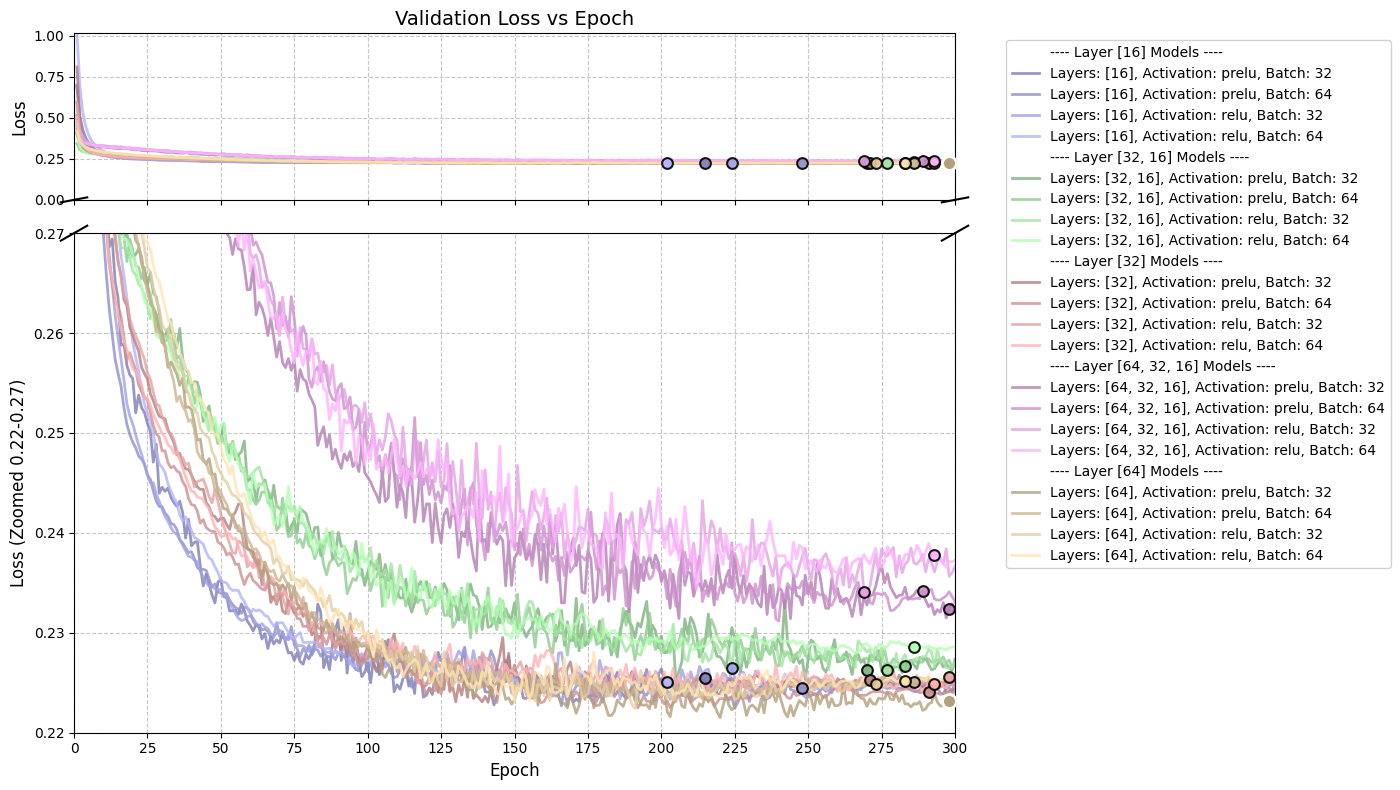

In [5]:
training_progress(data[('standardized', 'preprocessed', 'external')]['cv'], 'val_loss', 'Loss', *('standardized', 'preprocessed', 'external'), data[('standardized', 'preprocessed', 'external')]['optimals'], zoom_range=(0.22, 0.27), legend_columns=1)

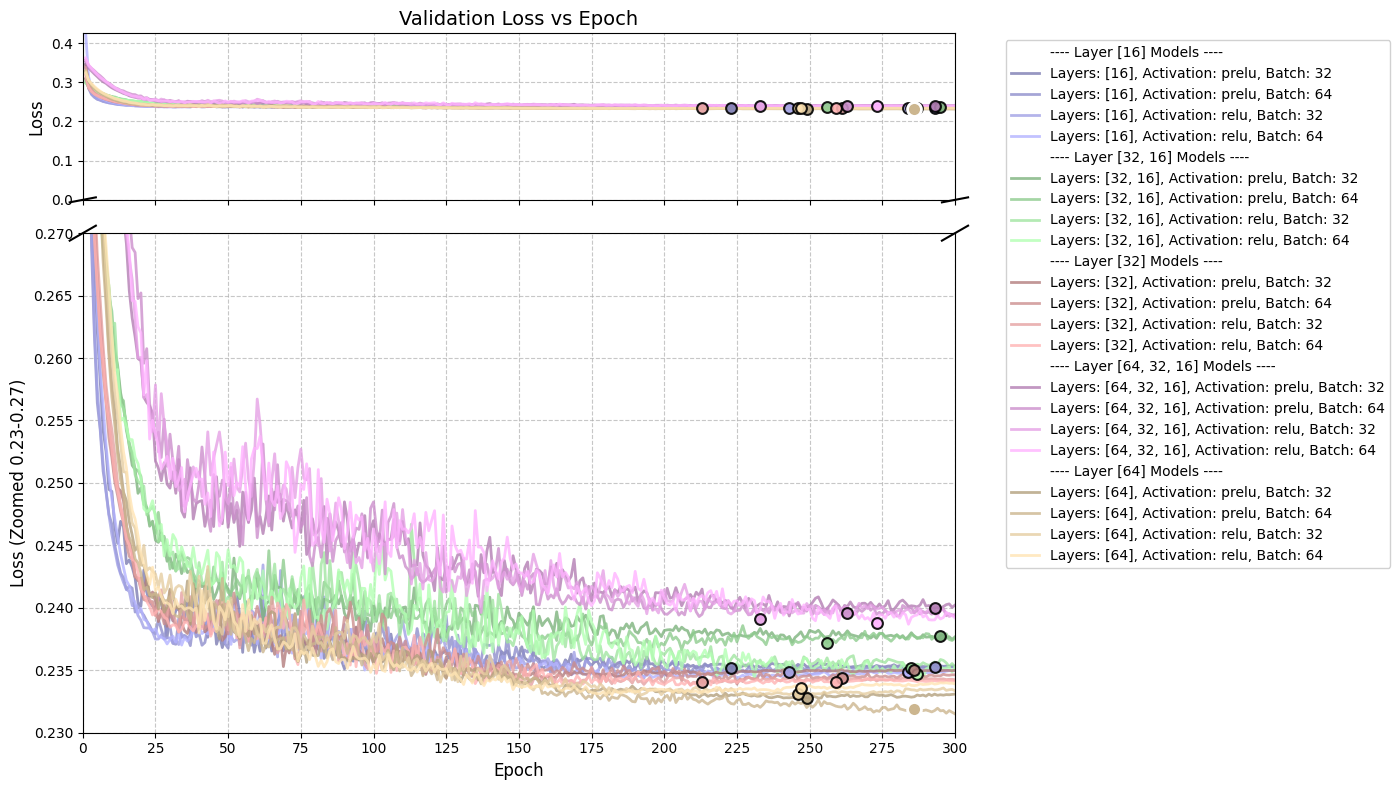

In [6]:
training_progress(data[('standardized', 'preprocessed', 'augmented')]['cv'], 'val_loss', 'Loss', *('standardized', 'preprocessed', 'augmented'), data[('standardized', 'preprocessed', 'augmented')]['optimals'], zoom_range=(0.23, 0.27), legend_columns=1)

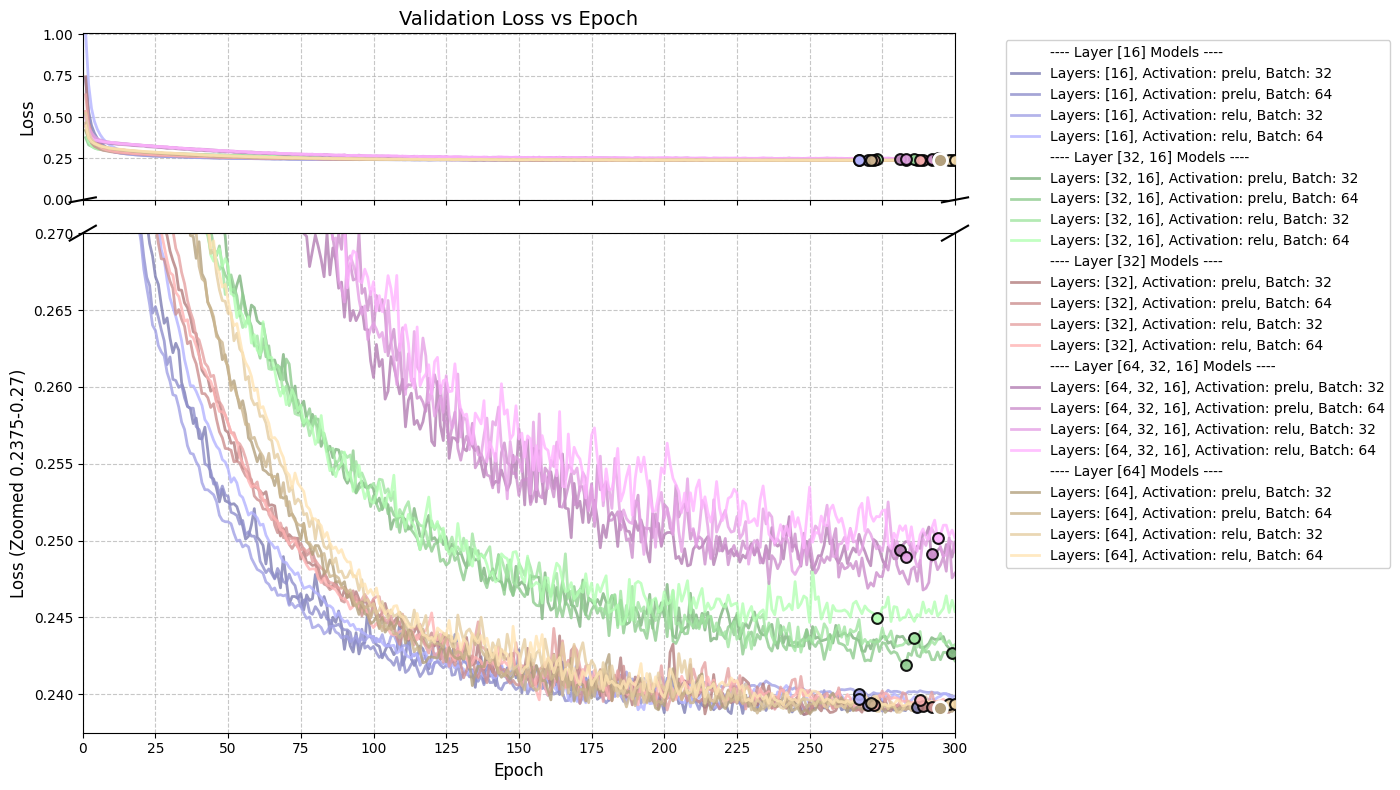

In [7]:
training_progress(data[('standardized', 'non_processed', 'external')]['cv'], 'val_loss', 'Loss', *('standardized', 'non_processed', 'external'), data[('standardized', 'non_processed', 'external')]['optimals'], zoom_range=(0.2375, 0.27), legend_columns=1)

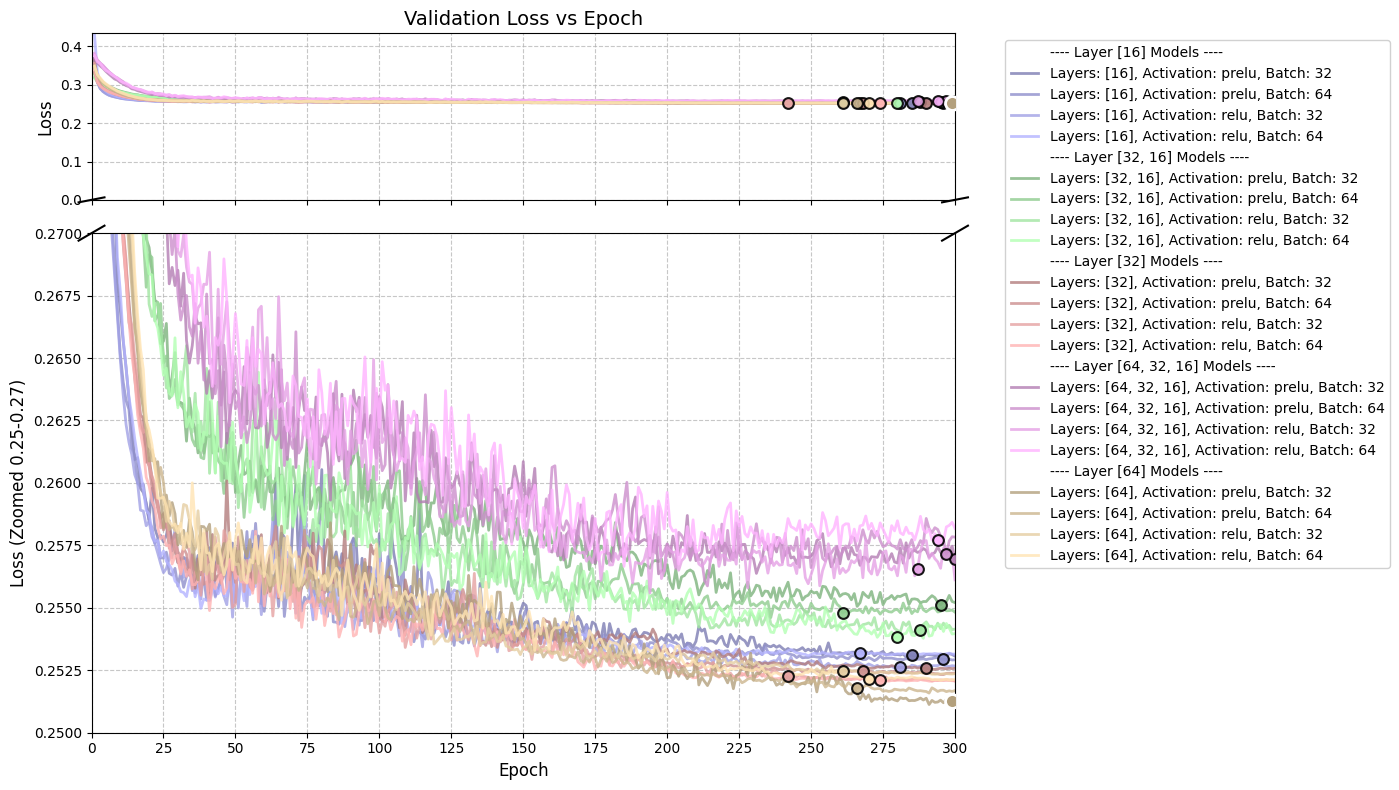

In [8]:
training_progress(data[('standardized', 'non_processed', 'augmented')]['cv'], 'val_loss', 'Loss', *('standardized', 'non_processed', 'augmented'), data[('standardized', 'non_processed', 'augmented')]['optimals'], zoom_range=(0.25, 0.27), legend_columns=1)

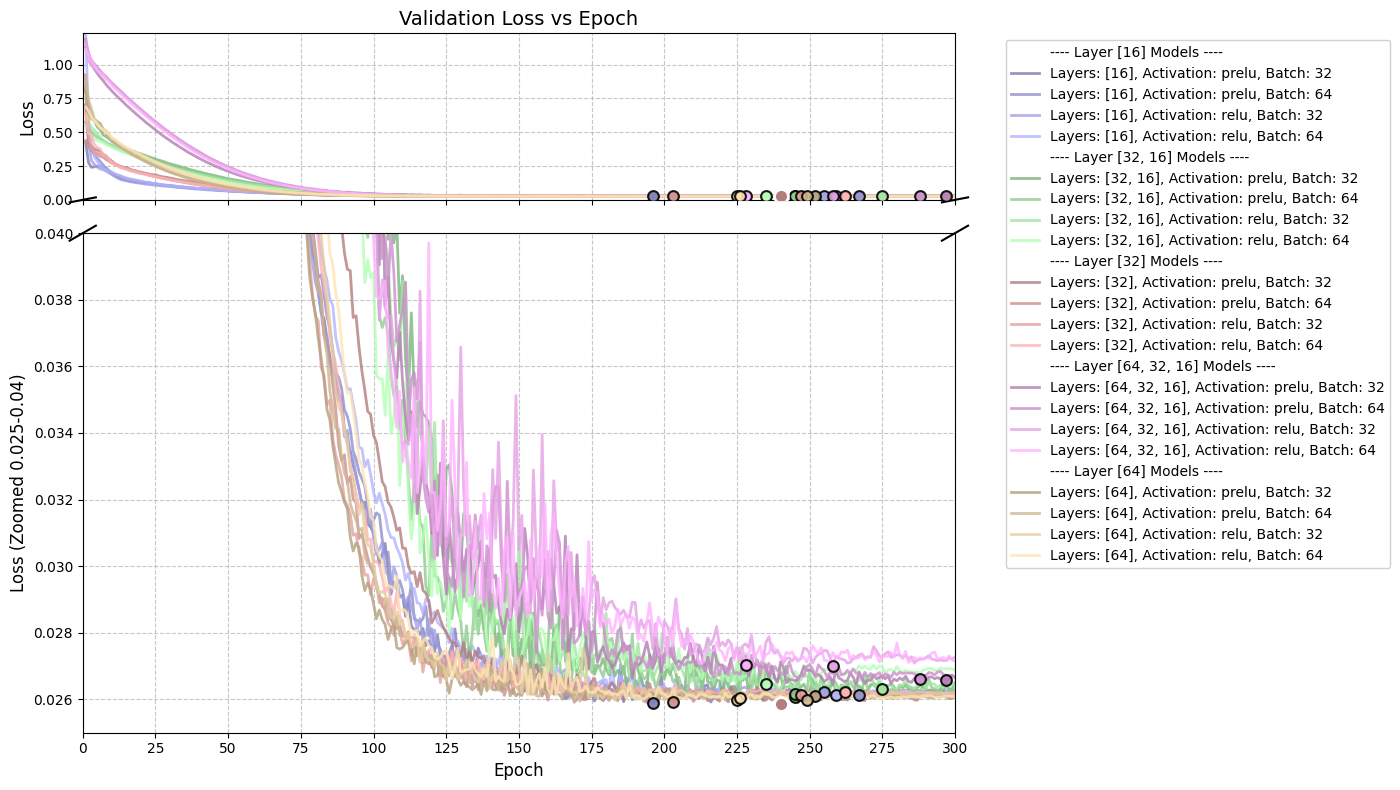

In [9]:
training_progress(data[('normalized', 'preprocessed', 'external')]['cv'], 'val_loss', 'Loss', *('normalized', 'preprocessed', 'external'), data[('normalized', 'preprocessed', 'external')]['optimals'], zoom_range=(0.0250, 0.04), legend_columns=1)

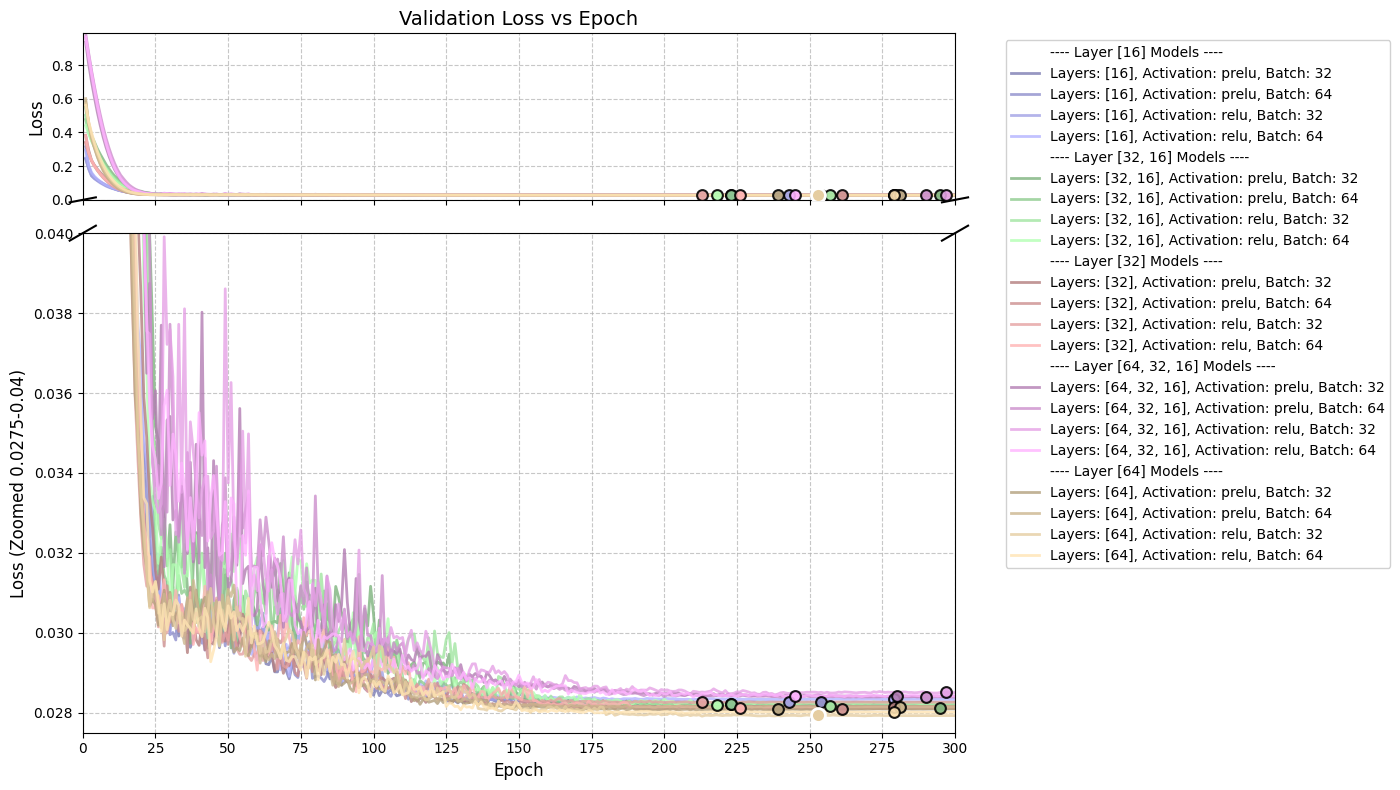

In [11]:
training_progress(data[('normalized', 'preprocessed', 'augmented')]['cv'], 'val_loss', 'Loss', *('normalized', 'preprocessed', 'augmented'), data[('normalized', 'preprocessed', 'augmented')]['optimals'], zoom_range=(0.0275, 0.04), legend_columns=1)

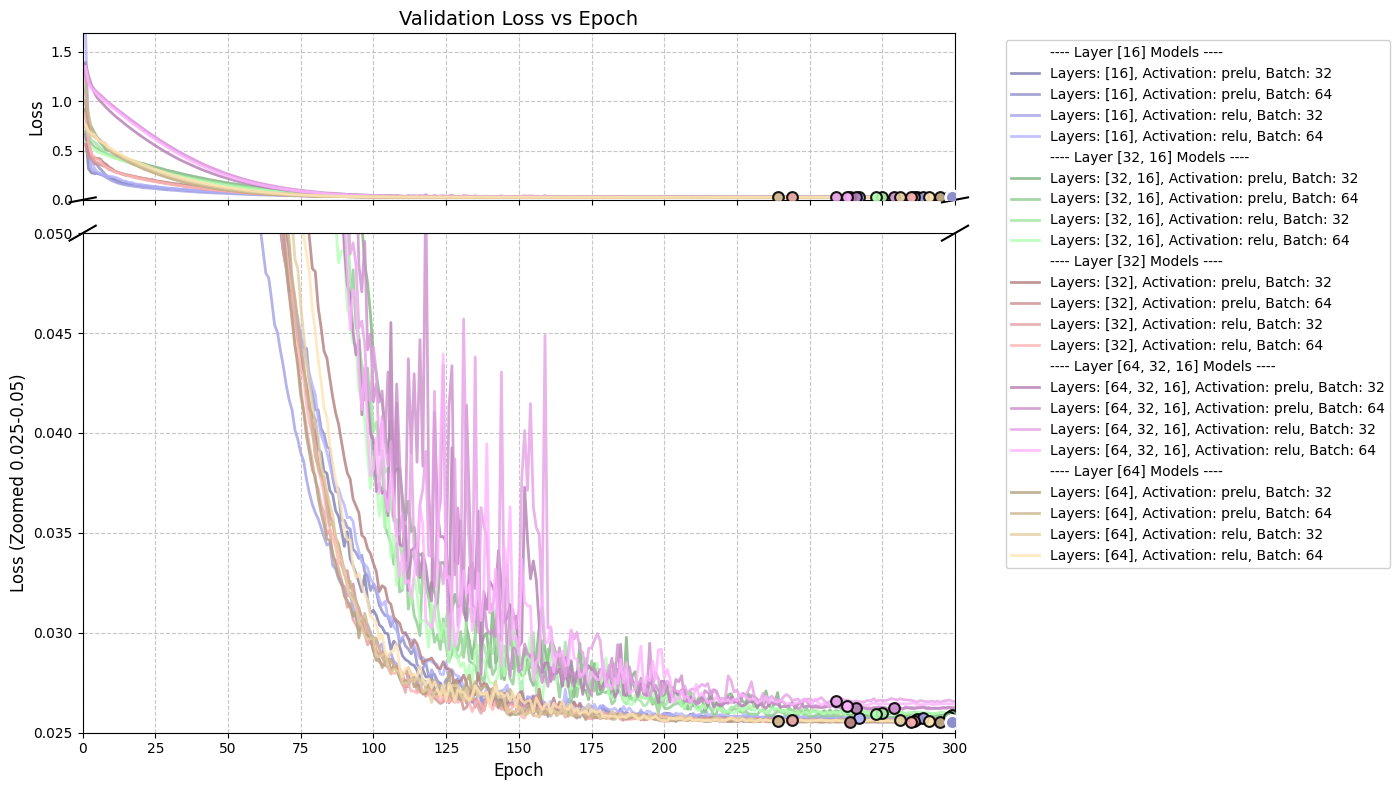

In [13]:
training_progress(data[('normalized', 'non_processed', 'external')]['cv'], 'val_loss', 'Loss', *('normalized', 'non_processed', 'external'), data[('normalized', 'non_processed', 'external')]['optimals'], zoom_range=(0.0250, 0.05),legend_columns=1)

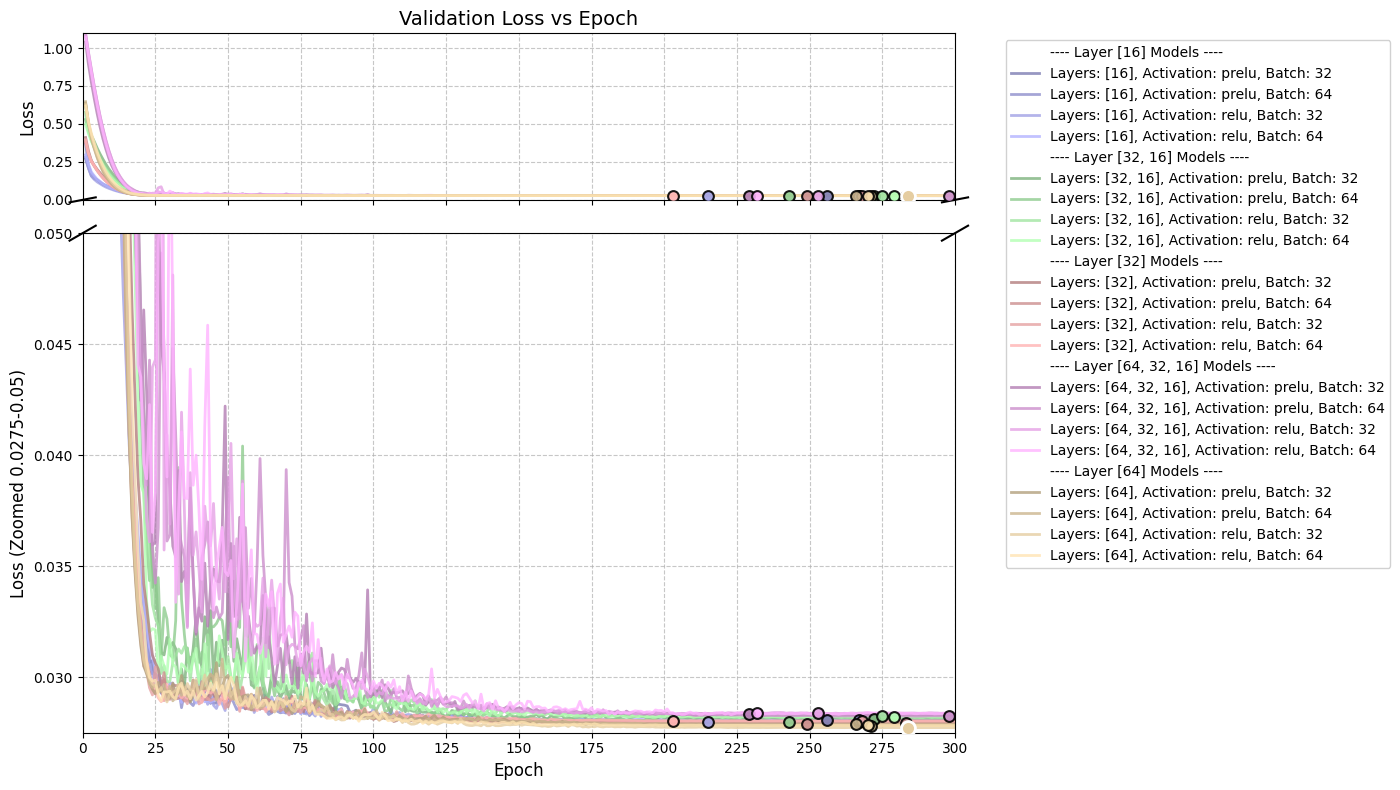

In [16]:
training_progress(data[('normalized', 'non_processed', 'augmented')]['cv'], 'val_loss', 'Loss', *('normalized', 'non_processed', 'augmented'), data[('normalized', 'non_processed', 'augmented')]['optimals'], zoom_range=(0.0275, 0.05), legend_columns=1)